## Twitter Big Data Analysis

### Checking Spark Session

In [7]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### Loading in the Data

In [8]:
twitter = "/user1/twitter_training.csv"

twitter_df = spark.read.csv(twitter, header='true', inferSchema='true')
twitter_df.createOrReplaceTempView("twitter")

In [9]:
twitter_df.printSchema()

root
 |-- 2401: integer (nullable = true)
 |-- Borderlands: string (nullable = true)
 |-- Positive: string (nullable = true)
 |-- im getting on borderlands and i will murder you all ,: string (nullable = true)



In [10]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [11]:
newSchema = StructType([\
                       StructField("tweet_ID", IntegerType(), True),
                       StructField("entity", StringType(), True),
                       StructField("sentiment", StringType(), True),
                       StructField("tweet_content", StringType(), True)
                       ])

In [12]:
twitter_df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", twitter)\
    .load()

In [13]:
twitter_df.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



### EDA and Preprocessing

In [14]:
print('Count of rows: {0}'.format(twitter_df.count()))
print('Count of distinct rows: {0}'.format(twitter_df.distinct().count()))

Count of rows: 74682


Count of distinct rows: 71938


In [15]:
twitter_df_preprocessing = twitter_df.dropDuplicates()
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [16]:
print('Count of rows: {0}'.format(twitter_df_preprocessing.count()))
print('Count of distinct rows: {0}'.format(twitter_df_preprocessing.distinct().count()))

Count of rows: 71938
Count of distinct rows: 71938


In [17]:
from pyspark.sql.functions import col, sum as spark_sum

In [18]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|          326|
+--------+------+---------+-------------+



In [19]:
# Dropping rows with missing values
twitter_df_preprocessing = twitter_df_preprocessing.dropna()

In [20]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|            0|
+--------+------+---------+-------------+



In [21]:
# Viewing the schema of the new DataFrame
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



In [22]:
# Viewing first few rows of the filtered DataFrame
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [23]:
# Checking the new shape of the DataFrame
num_rows = twitter_df_preprocessing.count()
num_columns = len(twitter_df_preprocessing.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 71612
Number of Columns: 4


### EDA : Statistical Analsysis

In [24]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_df_preprocessing.describe().show()


Basic Statistics for Numerical Columns:


24/04/17 00:02:46 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+---------------+----------+--------------------+
|summary|          tweet_ID|         entity| sentiment|       tweet_content|
+-------+------------------+---------------+----------+--------------------+
|  count|             71612|          71612|     71612|               71612|
|   mean| 6436.986440819975|           null|      null|  3.2857142857142856|
| stddev|3741.9147567754244|           null|      null|   2.054210364052382|
|    min|                 1|         Amazon|Irrelevant|                    |
|    max|             13200|johnson&johnson|  Positive|🧻 at Home Depot ...|
+-------+------------------+---------------+----------+--------------------+



In [25]:
# Importing the necessary functions libraries
#import pyspark.sql.functions as func

In [26]:
# Calculating the distribution of the sentiment categories
sentiment_distribution = twitter_df_preprocessing.groupBy('sentiment').count()

# Viweing the distribution
sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|12528|
|  Positive|19702|
|   Neutral|17691|
|  Negative|21691|
+----------+-----+



According to the datafset documentation, 'Irrelevant' messages can be considered as neutral. ((www.kaggle.com, n.d.))

### EDA : Frequency Distribution of Sentiment

In [27]:
import matplotlib.pyplot as plt

In [28]:
# Converting the Spark DataFrame to a Pandas DataFrame for visuals
sentiment_distribution_pd = sentiment_distribution.toPandas()

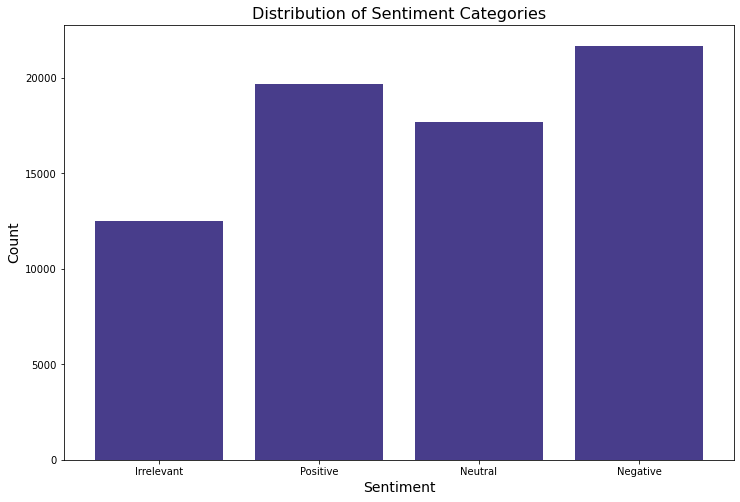

In [29]:
# Plotting a graph of distribution
plt.figure(figsize=(12, 8))
plt.bar(sentiment_distribution_pd['sentiment'], sentiment_distribution_pd['count'], color='DarkSlateBlue')
plt.title('Distribution of Sentiment Categories', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [30]:
#pip install seaborn

In [31]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
# Selecting a specific entity to analyse
entity_of_interest = 'johnson&johnson'

In [33]:
# Filtering the DataFrame 
johnson_johnson_df = twitter_df_preprocessing.filter(twitter_df_preprocessing.entity == entity_of_interest)

johnson_johnson_df.show()

+--------+---------------+----------+--------------------+
|tweet_ID|         entity| sentiment|       tweet_content|
+--------+---------------+----------+--------------------+
|    6853|johnson&johnson|   Neutral|Adrian Thomas, vi...|
|    6866|johnson&johnson|Irrelevant| Vaccines Production|
|    6890|johnson&johnson|  Negative|They've had a leg...|
|    6909|johnson&johnson|   Neutral|Behind the $55 mi...|
|    6940|johnson&johnson|   Neutral|.  TYLENOL Cold H...|
|    6944|johnson&johnson|   Neutral|The Missouri Cour...|
|    6955|johnson&johnson|  Negative|Johnson & The Joh...|
|    6965|johnson&johnson|  Negative|              or wtf|
|    6971|johnson&johnson|  Positive|AstraZeneca and J...|
|    6973|johnson&johnson|  Positive|       Thank of God.|
|    6998|johnson&johnson|  Positive|cock & Johnson Re...|
|    7005|johnson&johnson|   Neutral|Johnson & Johnson...|
|    7040|johnson&johnson|   Neutral|Transvaginal mesh...|
|    7043|johnson&johnson|  Negative|Johnson & Johnson..

In [34]:
# Calculating the distribution of sentiment categories
johnson_johnson_sentiment_distribution = johnson_johnson_df.groupBy('sentiment').count()
johnson_johnson_sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|  192|
|   Neutral| 1001|
|  Positive|  252|
|  Negative|  809|
+----------+-----+



In [35]:
# Ordering the DataFrame in descending order
johnson_johnson_sentiment_distribution = johnson_johnson_sentiment_distribution.orderBy('count', ascending=False)

In [36]:
# Converting to Pandas DataFrame for visualization
johnson_johnson_sentiment_distribution_pd = johnson_johnson_sentiment_distribution.toPandas()

/tmp/ipykernel_77150/78352180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')


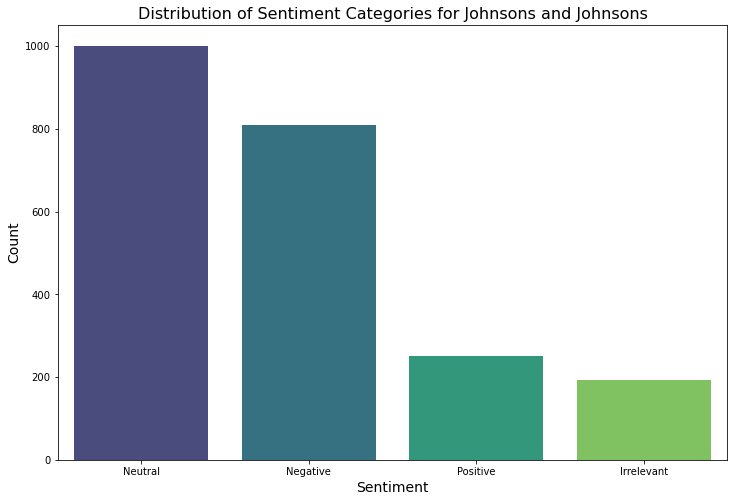

In [37]:
# Creating a Seaborn Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')
plt.title('Distribution of Sentiment Categories for Johnsons and Johnsons', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

One of the main applications and use cases of this asignment is sentiment analysis of big data, whether from a live stream or static source. In order to recreate this, we will remove the sentiment column provided with the dataset and conduct our own sentiment analysis of the data using spark.

In [38]:
# Dropping the 'sentiment' column
twitter_df_preprocessing = twitter_df_preprocessing.drop('sentiment')

In [39]:
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- tweet_content: string (nullable = true)



#### Saving to HDFS

In [40]:
path = "/user1/twitter2"

In [41]:
twitter_df_preprocessing.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

## Reading in  a new Dataset of larger volume

In [42]:
twitter_cs = "/user1/twcs.csv"

twitter_cs_df = spark.read.csv(twitter_cs, header='true', inferSchema='true')
twitter_cs_df.createOrReplaceTempView("twitter_cs")

In [43]:
twitter_cs_df.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)



In [44]:
twitter_cs_df.show()

+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|          created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|Tue Oct 31 22:10:...|@115712 I underst...|                2|                      3|
|       2|      115712|   True|Tue Oct 31 22:11:...|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|Tue Oct 31 22:08:...|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|Tue Oct 31 21:54:...|@115712 Please se...|                3|                      5|
|       5|      115712|   True|Tue Oct 31 21:49:...|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|Tue Oct 31 21:46:...|@115712 Can you p...

### EDA: Characterising, Cleaning and Data Prep

#### Checking the number of rows and columns

In [45]:
# Checking the shape of the DataFrame
num_rows = twitter_cs_df.count()
num_columns = len(twitter_cs_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2966469
Number of Columns: 7


#### Checking for missing values

In [46]:
# Importing the required functions
from pyspark.sql.functions import col, sum as spark_sum

In [47]:
# Counting missing values for each feature column
missing_values = twitter_cs_df.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_cs_df.columns))

# Displaying the missing value count
missing_values.show()

+--------+---------+-------+----------+------+-----------------+-----------------------+
|tweet_id|author_id|inbound|created_at|  text|response_tweet_id|in_response_to_tweet_id|
+--------+---------+-------+----------+------+-----------------+-----------------------+
|      20|    68072|  86934|    146363|153179|          1271596|                1010542|
+--------+---------+-------+----------+------+-----------------+-----------------------+



We see that every column contains missing values. This is expected for 'response_tweet_id' and 'in_response_to_tweet_id' as not every tweet is in response or receieves a response. The missing values would need to be handled according to the analysis being conducted and the nature of the missing values, whether missing at random (MAR), missing completely at random (MCAR) or missing not at random (MNAR). Mising values may be imputed based on statistical findings, removed, flagged or ignored. Domain knowledge would significantly aid in determining the best method. In developing a predictive model, missing values could significatly impact the models performance. As our intent is to demontrate the effectiveness of processing and analysing big data using Spark, which we intent to do using map-reduce, word count and sentiment analysis of the 'text', we will ignore them for now.

#### Checking for duplicate rows

In [48]:
print('Count of rows: {0}'.format(twitter_cs_df.count()))
print('Count of distinct rows: {0}'.format(twitter_cs_df.distinct().count()))
dif = ((twitter_cs_df.count()) - (twitter_cs_df.distinct().count()))
print(f'There are {dif} duplicate rows.')

Count of rows: 2966469


Count of distinct rows: 2954825


There are 11644 duplicate rows.


In [49]:
# # Remove duplicate rows
# twitter_cs_df_no_duplicates = twitter_cs_df.dropDuplicates()

# # Check the shape of the DataFrame after removing duplicates
# num_rows_no_duplicates = twitter_cs_df_no_duplicates.count()
# num_columns_no_duplicates = len(twitter_cs_df_no_duplicates.columns)

# print("The shape of the DataFrame after removing duplicates:\n")
# print("Number of Rows:", num_rows_no_duplicates)
# print("Number of Columns:", num_columns_no_duplicates)

In [50]:
# List of columns that we want to iterate through
columns_to_check = twitter_cs_df.columns

#  for loop to iterate through each column to identify duplicate rows
for col_name in columns_to_check:
    
    # Grouping the current column and the count occurrences
    duplicate_rows = twitter_cs_df.groupBy(col_name).count().where('count > 1')
    
    # Sorting in descending order and display the top 20
    print(f"Top 20 duplicates based on column '{col_name}' in descending order of count:")
    duplicate_rows.orderBy(col("count").desc()).show(n=20)

Top 20 duplicates based on column 'tweet_id' in descending order of count:


+--------------------+-----+
|            tweet_id|count|
+--------------------+-----+
|             Regards| 4484|
|                Rgds| 1808|
|               ^HSB"| 1421|
|               ^ACM"|  980|
|               ^ADP"|  956|
|               ^NHP"|  918|
|             -Andre"|  913|
|               ^TXA"|  852|
| https://t.co/EYp...|  846|
|           Darshan."|  829|
|               ^JAY"|  807|
|               ^TDC"|  767|
|               ^FEM"|  745|
|               ^BAB"|  719|
|              Thanks|  656|
|             Amruta"|  534|
|               ^TNT"|  518|
|                ^RR"|  508|
|                ^MD"|  496|
|               ^CAR"|  453|
+--------------------+-----+
only showing top 20 rows

Top 20 duplicates based on column 'author_id' in descending order of count:


+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|           null| 68072|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
+---------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'inbound' in descending order of count:


+--------------------+-------+
|             inbound|  count|
+--------------------+-------+
|                True|1537843|
|               False|1273931|
|                null|  86934|
|                5965|     19|
|              514494|     17|
|                    |     13|
|              961019|     10|
| as we consider i...|      8|
|             1296040|      8|
|              625011|      8|
|               50714|      7|
|               32886|      7|
|              727482|      7|
|              776192|      7|
|              691490|      6|
|              778409|      6|
|               37012|      6|
|              323165|      6|
| so kindly reply ...|      6|
|               19137|      6|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'created_at' in descending order of count:


+--------------------+------+
|          created_at| count|
+--------------------+------+
|                null|146363|
|Wed Oct 18 10:15:...|    18|
|Sat Dec 02 00:53:...|    15|
|Fri Dec 01 19:18:...|    15|
|Sun Nov 26 16:33:...|    14|
|Fri Dec 01 19:23:...|    13|
|Sun Nov 19 23:29:...|    13|
|Fri Oct 27 13:00:...|    13|
|Sun Oct 08 10:32:...|    12|
|Sun Dec 03 17:43:...|    12|
|Sat Nov 25 14:00:...|    12|
|Sun Nov 26 16:33:...|    12|
|Thu Nov 16 14:00:...|    12|
|Thu Oct 12 13:09:...|    11|
|Tue Oct 17 16:24:...|    11|
|Thu Oct 05 04:22:...|    11|
|Thu Oct 12 17:48:...|    11|
|Fri Nov 03 18:48:...|    11|
|Mon Nov 06 14:00:...|    11|
|Mon Oct 16 18:18:...|    11|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'text' in descending order of count:


+--------------------+------+
|                text| count|
+--------------------+------+
|                null|153179|
|       @ComcastCares|  3051|
|     @AirAsiaSupport|   418|
|            @115850 |   344|
|@Uber_Support __e...|   315|
|      @Uber_Support |   298|
|@azuresupport #az...|   290|
|        @AmazonHelp |   267|
|      @AppleSupport |   256|
|    @AirAsiaSupport |   222|
|@HPSupport [TYPE ...|   202|
|    @AskPlayStation |   188|
| @VerizonSupport Yes|   179|
|@AppleSupport 11.0.3|   177|
|        @idea_cares |   176|
|    @Safaricom_Care |   172|
|     @AmazonHelp Yes|   165|
|@ComcastCares: #m...|   150|
|       @AppleSupport|   147|
|  @Uber_Support Done|   142|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'response_tweet_id' in descending order of count:


+--------------------+-------+
|   response_tweet_id|  count|
+--------------------+-------+
|                null|1271596|
| then change it b...|     13|
|             right?"|     11|
| and entering you...|     10|
| please visit; ht...|      9|
|            please?"|      7|
|                   F|      7|
|               etc."|      6|
|                ^AK"|      6|
|              though|      5|
| please try again...|      5|
|                 M-F|      5|
|            thanks!"|      5|
|            thanks."|      5|
|                   -|      5|
|          start over|      5|
|         thank you."|      4|
|       Monday-Friday|      4|
| and then select ...|      4|
| Weekly and Month...|      4|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'in_response_to_tweet_id' in descending order of count:


+-----------------------+-------+
|in_response_to_tweet_id|  count|
+-----------------------+-------+
|                   null|1010542|
|                 625011|    827|
|                 776192|    552|
|                  37012|    291|
|                  87814|    171|
|                   5965|    164|
|                2390546|    163|
|                  56184|    160|
|                 677161|    137|
|                 615427|    136|
|                    409|    133|
|                 692392|    129|
|                2572370|    127|
|                 414715|    121|
|                 189825|    117|
|                  15807|    116|
|                   5159|    114|
|                  19541|    107|
|                  82436|    104|
|                1343823|    102|
+-----------------------+-------+
only showing top 20 rows



Again we find that the dataset contains numerous duplicate entries per column. This is to be expected as the same identifiers for 'author_id', 'response_tweet_id' and 'in_response_to_tweet_id' are being used to track teweets. 'inbound' is expected to be a catergorical varaible of either True or False but appears to conatin other values, while 'tweet_id' is expected to be unique and of integer type but also contains mixed values. As with the missing values, this would need to be handled based on the intended use. Ignoring them should not affect our sentiment or word frequency analysis, but we will clean the dataset to aid in further EDA with graphics. 

### Preprocessing: Data Types and Null values

 Type casting the 'tweet_id', 'response_tweet_id', and 'in_response_to_tweet_id' to there correct integer datatypes.

In [51]:
# Converting tweet_id column to integer and dropping rows/filtering with non-integer values
twitter_cs_preprocessing_df = twitter_cs_df.withColumn("tweet_id", col("tweet_id").cast("int")) \
    .filter(col("tweet_id").isNotNull())

In [52]:
from pyspark.sql.functions import col, when

In [53]:
# Type Casting 'response_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("response_tweet_id", \
    when(col("response_tweet_id").isNull(), None).otherwise(col("response_tweet_id").cast("int")))

In [54]:
# Type Casting 'in_response_to_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("in_response_to_tweet_id", \
    when(col("in_response_to_tweet_id").isNull(), None).otherwise(col("in_response_to_tweet_id").cast("int")))

In [55]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



In [56]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


 Cleaning the 'inbound' column which should only contain 'True' and 'False' values but imputing others with 'Unknown'

In [57]:
# Importing sparksql function
from pyspark.sql.functions import when

In [58]:
# Replace values other than 'True' or 'False', including null, with 'Unknown'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("inbound", when((col("inbound") == "True") | 
                                                         (col("inbound") == "False"), 
                                                         col("inbound")).otherwise("Unknown"))

In [59]:
unique_inbound_values = twitter_cs_preprocessing_df.groupBy("inbound").count().collect()
print("Unique values and their counts in 'inbound' column:")
for row in unique_inbound_values:
    print(f"{row['inbound']}: {row['count']}")

Unique values and their counts in 'inbound' column:
False: 1273931
Unknown: 530
True: 1537843


Type casting the 'created_at' column to its correct data type datetime using timestamp

In [60]:
from pyspark.sql.functions import to_timestamp

In [61]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [62]:
# Casting 'created_at' column to datetime
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("created_at", \
    to_timestamp("created_at", "EEE MMM dd HH:mm:ss Z yyyy"))

In [63]:
twitter_cs_preprocessing_df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

In [64]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



### EDA: Statistical Description

In [65]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_cs_preprocessing_df.describe().show()


Basic Statistics for Numerical Columns:


+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|summary|          tweet_id|         author_id|inbound|               text| response_tweet_id|in_response_to_tweet_id|
+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|  count|           2812304|           2811828|2812304|            2811783|           1477184|                1953086|
|   mean|1508979.4198792165|423300.33347682294|   null|  1.3826924659675E9|1514870.6502284075|     1463420.6321385745|
| stddev|2176779.8277876023|207169.43218544274|   null|3.174050310345598E9| 865950.1322858942|      864586.6791693122|
|    min|             -2017|              1331|  False|              69.61|                 1|                      0|
|    max|        1403649393|        sprintcare|Unknown|        🧕🏽 @delta|           2987947|                2987950|
+-------+------------------+------------------+---

In [66]:
# Convert Spark DataFrame to Pandas DataFrame
statistics_pd = twitter_cs_preprocessing_df.describe().toPandas()

# Display the Pandas DataFrame
print("\nBasic Statistics for Numerical Columns:")
statistics_pd


Basic Statistics for Numerical Columns:


,summary,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,count,2812304,2811828,2812304,2811783,1477184,1953086
1,mean,1508979.4198792165,423300.33347682294,None,1.3826924659675E9,1514870.6502284075,1463420.6321385745
2,stddev,2176779.8277876023,207169.43218544274,None,3.174050310345598E9,865950.1322858942,864586.6791693122
3,min,-2017,1331,False,69.61,1,0
4,max,1403649393,sprintcare,Unknown,🧕🏽 @delta,2987947,2987950


### EDA: with Graphics

In [67]:
# Grouping by author_id and counting the occurrences
author_counts = twitter_cs_preprocessing_df.groupBy("author_id").count().orderBy("count", ascending=False)
author_counts.show()

+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
| ChipotleTweets| 18749|
+---------------+------+
only showing top 20 rows



In [68]:
# Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Converting to Pandas DataFrame and limiting to the top 15 authors
top_authors_pd = author_counts.limit(20).toPandas()

In [70]:
# Filtering out null values before plotting
top_authors_pd_filtered = top_authors_pd[top_authors_pd['author_id'].notna()]

/tmp/ipykernel_77150/2704774328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')


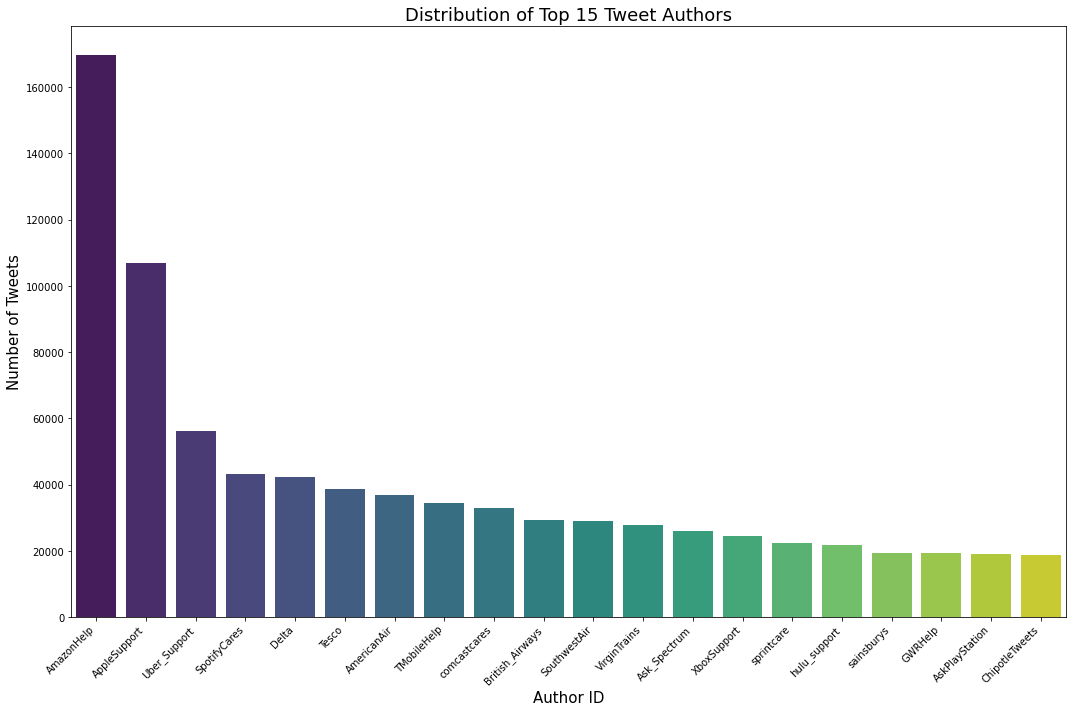

In [71]:
# Plotting the distribution of top 120 tweet authors
plt.figure(figsize=(15, 10))
sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')
plt.xlabel('Author ID', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Distribution of Top 15 Tweet Authors', fontsize = 18)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

From the information within this dataset we find that AmazonHelp and AppleSupport customer support are the most frequently tweeting customer support teams with almost twice as meany as the remaining top 20 combined.

In [72]:
# Grouping the data by 'inbound' column and counting the occurrences
inbound_outbound_counts = twitter_cs_preprocessing_df.groupBy("inbound").count().toPandas()

In [73]:
# Sorting the DataFrame by count in descending order
inbound_outbound_counts = inbound_outbound_counts.sort_values(by="count", ascending=False)

In [74]:
# Converting counts to millions for readability
inbound_outbound_counts["count_millions"] = inbound_outbound_counts["count"] / 1000000

/tmp/ipykernel_77150/40282955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')


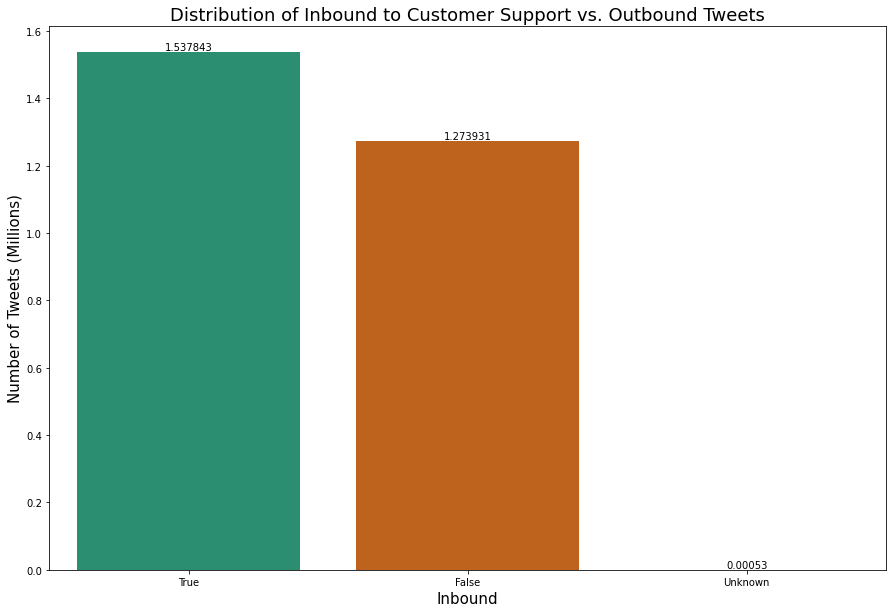

In [75]:
# Plotting the distribution of 'inbound'
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')
plt.xlabel('Inbound', fontsize = 15)
plt.ylabel('Number of Tweets (Millions)', fontsize = 15)
plt.title('Distribution of Inbound to Customer Support vs. Outbound Tweets', fontsize = 18)
for index, value in enumerate(inbound_outbound_counts["count_millions"]):
    plt.text(index, value, str(value), ha ='center', va = 'bottom',  fontsize=10)

plt.show()

Based on the visual above we find that customer support teams do not respond to every tweet directed there way.

In [76]:
from pyspark.sql.functions import length

In [77]:
# Calculating lengths of each tweet
twitter_cs_preprocessing_df2 = twitter_cs_preprocessing_df.withColumn("tweet_length", length("text"))

In [78]:
twitter_cs_preprocessing_df2.show(truncate = 14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

In [79]:
twitter_cs_preprocessing_df2.select('text', 'tweet_length').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|text                                                                                                                                                                |tweet_length|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.                                           |121         |
|@sprintcare and how do you propose we do that                                                                                                                       |45          |
|@sprintcare I have sent several private messages and no one is responding as usual                 

In [80]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
tweet_length_pd = twitter_cs_preprocessing_df2.select("tweet_length").toPandas()

In [81]:
import pandas as pd

# Disabling scientific notation
pd.options.display.float_format = '{:.2f}'.format

tweet_length_pd['tweet_length'].describe()

count   2811783.00
mean        111.34
std          52.26
min           1.00
25%          75.00
50%         113.00
75%         139.00
max         513.00
Name: tweet_length, dtype: float64

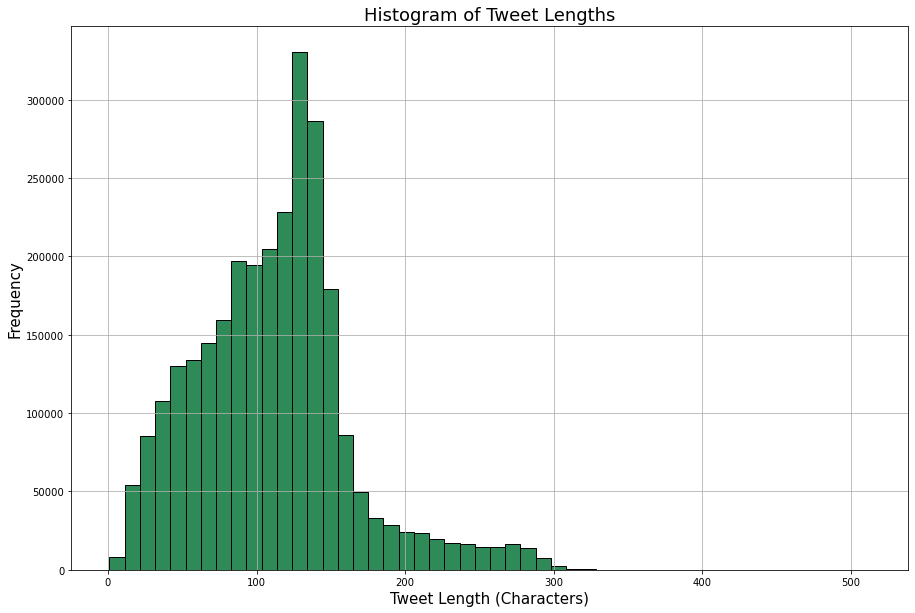

In [82]:
plt.figure(figsize=(15, 10))
plt.hist(tweet_length_pd["tweet_length"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Characters)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Histogram of Tweet Lengths', fontsize = 18)
plt.grid(True)
plt.show()

We find that the distribution of characters for tweets is right skewed. Most tweets contain around 111 characters with a standard deviation of around 52 characters. There are outliers with over 500 characters.

In [83]:
#from pyspark.sql.functions import year, month
from pyspark.sql import functions as F
from pyspark.sql.functions import col, date_format, dayofweek, month, year

In [84]:
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df2.filter(col("created_at").isNotNull())

# Engineering new columns for plotting
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("day_of_week", dayofweek("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("month", month("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("year", year("created_at"))

In [85]:
# Grouping by and counting tweets by the days of the week
tweets_by_day_of_week = twitter_cs_preprocessing_df3.groupBy("day_of_week").count().orderBy("day_of_week")

In [86]:
tweets_by_day_of_week_pd = tweets_by_day_of_week.toPandas()

/tmp/ipykernel_77150/3077784446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")


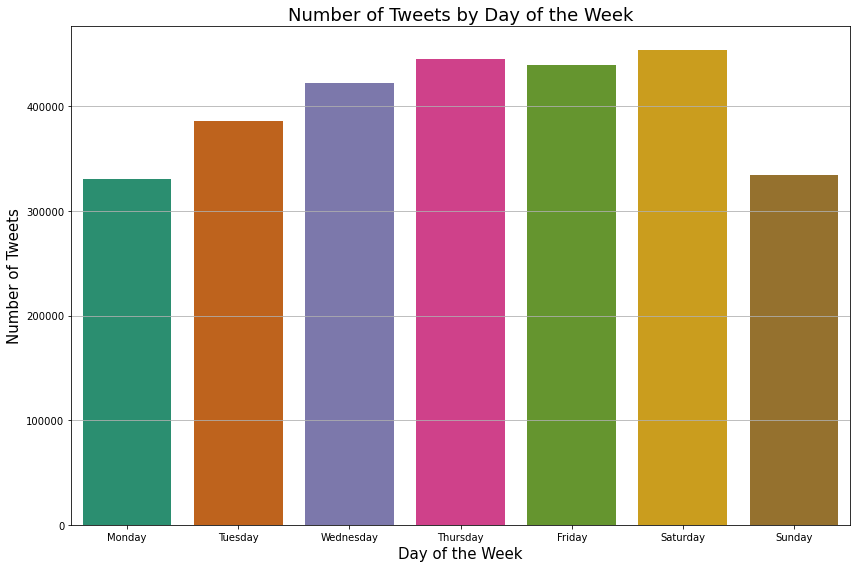

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Number of Tweets by Day of the Week', fontsize = 18)
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

From the visual above we find that the fewest tweet to and from customer support occur on a Monday and Sunday, while Thursday, Friday and Saturday produce the highest traffic. This is useful information when allocating resources for customer support.

In [88]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


In [89]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



In [90]:
twitter_cs_preprocessing_df.show()  

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

In [91]:
twitter_cs_preprocessing_df2.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

### Writing to HDFS

In [101]:
# Save DataFrame as CSV
csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
twitter_cs_preprocessing_df.write.csv(csv_path, mode="overwrite", header=True)

# Save Schema as Text File
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
schema_str = str(twitter_cs_preprocessing_df.schema)
sc.parallelize([schema_str]).saveAsTextFile(schema_path)

In [107]:
# Save Schema as JSON
import json

schema_json = twitter_cs_preprocessing_df.schema.json()
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.json"

with open(schema_path, "w") as file:
    file.write(schema_json)

FileNotFoundError: [Errno 2] No such file or directory: 'hdfs://localhost:9000/user1/twitter_customer_support/schema.json'

In [108]:
import json
import os

schema_json = twitter_cs_preprocessing_df.schema.json()

# Specify the directory path
directory_path = "hdfs://localhost:9000/user1/twitter_customer_support/"

# Create the directory if it does not exist
os.makedirs(directory_path, exist_ok=True)

# Specify the schema JSON file path
schema_path = os.path.join(directory_path, "schema.json")

# Save the schema JSON file
with open(schema_path, "w") as file:
    file.write(schema_json)


In [104]:
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"

# Convert schema to JSON string
schema_json = twitter_cs_preprocessing_df.schema.json()

# Write JSON string to text file
with open(schema_path, "w") as file:
    file.write(schema_json)

FileNotFoundError: [Errno 2] No such file or directory: 'hdfs://localhost:9000/user1/twitter_customer_support/schema.txt'

In [105]:
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"

# Convert schema to JSON string
schema_json = twitter_cs_preprocessing_df.schema.json()

# Create an RDD with a single element containing the schema JSON string
schema_rdd = sc.parallelize([schema_json])

# Save the RDD as a text file in HDFS
schema_rdd.saveAsTextFile(schema_path)

Py4JJavaError: An error occurred while calling o480.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory hdfs://localhost:9000/user1/twitter_customer_support/schema.txt already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1593)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1593)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1579)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1579)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:563)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


In [92]:
path = "/user1/twitter_customer_support"

In [93]:
# Saving the dataframe as a csv
twitter_cs_preprocessing_df.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

In [ ]:
hdfs://localhost:9000/user1/twitter_customer_support.csv

In [100]:
# Saving the schema as a text file
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
with open(schema_path, "w") as file:
    file.write(str(twitter_cs_preprocessing_df.schema))

FileNotFoundError: [Errno 2] No such file or directory: 'hdfs://localhost:9000/user1/twitter_customer_support/schema.txt'

### Reading from HDFS

In [113]:
# Specify the CSV file path
csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"

# Read the CSV file into a DataFrame
df_with_schema = spark.read.csv(csv_path, header=True)

# Specify the schema JSON file path
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.json"

# Read the schema JSON file
with open(schema_path, "r") as file:
    schema_json = file.read()

# Parse the schema JSON string into a StructType object
parsed_schema = StructType.fromJson(json.loads(schema_json))

# Apply the parsed schema to the DataFrame
for field in parsed_schema:
    df_with_schema = df_with_schema.withColumnRenamed(field.name, field.name)

# Alternatively, you can use selectExpr
# exprs = [f"{field.name} AS {field.name}" for field in parsed_schema]
# df_with_schema = df_with_schema.selectExpr(*exprs)


In [103]:
from pyspark.sql.types import StructType
import json 
# Read CSV File
csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
df_with_schema = spark.read.csv(csv_path, header=True)

# Read Schema Text File
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
schema_rdd = sc.textFile(schema_path)
schema_str = schema_rdd.collect()[0]  # Assuming schema is stored in a single line
parsed_schema = StructType.fromJson(json.loads(schema_str))

# Apply Schema to DataFrame
df_with_schema = df_with_schema.schema(parsed_schema)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [109]:
from pyspark.sql.types import StructType

# Read CSV File
csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
df_with_schema = spark.read.csv(csv_path, header=True)

# Read Schema Text File
schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
schema_rdd = sc.textFile(schema_path)
schema_str = schema_rdd.collect()[0]  # Assuming schema is stored in a single line

# Parse JSON schema string
parsed_schema = StructType.fromJson(json.loads(schema_str))

# Apply Schema to DataFrame
df_with_schema = df_with_schema.schema(parsed_schema)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [95]:
# Defining the HDFS path where the CSV file and schema file are saved
path = "/user1/twitter_customer_support"

In [ ]:
# Reading the schema from the saved schema file
schema_path = path + "/schema.txt"
with open(schema_path, "r") as file:
    schema_str = file.read()

In [ ]:
from pyspark.sql.types import StructType

In [ ]:
# Converting schema string back to a StructType object
saved_schema = StructType.fromJson(eval(schema_str))

In [97]:
# Reading in the CSV file with the saved schema
twitter_cs_preprocessing_df = spark.read \
    .format("csv") \
    .schema(saved_schema) \
    .option("header", "true") \
    .load(path)


AnalysisException: [PATH_NOT_FOUND] Path does not exist: hdfs://localhost:9000/user1/twitter_customer_support.csv.

In [114]:
df_with_schema.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)



### Reading from HBase

In [ ]:
# hbase_df = spark.read \
#     .format("org.apache.spark.sql.execution.datasources.hbase") \
#     .option("hbase.table", "your_hbase_table") \
#     .option("hbase.columns.mapping", "cf:col1,cf:col2") \
#     .load()


In [ ]:
# # Show the DataFrame
# hbase_df.show()

In [ ]:
# # Viewing the Schema
# hbase_df.printSchema()

In [ ]:
# df_cached = hbase_df.cache()
# print(df_cached.count())

### Word Count

On reading in the data we will now cache the Spark Dataframe to memory for faster access. This is one of the key features of Apache Spark which allow up to 100 times quicker processing than Hadoop Map-Reduce.

In [ ]:
df_cached = twitter_cs_preprocessing_df.cache()

We will drop any null values within the 'text' column before tekenising the feature. The tokeniser function is provided by Sparks Machine Learning library. Another benefit provided over Hadoop Map-reduce.

In [ ]:
df_cached = df_cached.dropna(subset=['text'])

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
tokenizer = Tokenizer(inputCol = 'text',
                     outputCol = 'words')

In [ ]:
df_cached = tokenizer.transform(df_cached)

In [ ]:
df_cached.show(truncate=12)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

Will will use User Defined Function (UDF) to demonstrate another feature in SparkSQL. UDF's allow us to customise functions in languages like Java, Scala or in ur case Python. Here we call the udf count_tokens which will count the number of words as integers in the words array column thats generated by the tokenizer.

In [ ]:
count_tokens = udf(lambda words: len(words), IntegerType())

On applying the udf we create a new colum 'num_words' for the number of words within 'word' and keep the df in memory.

In [ ]:
df_cached = df_cached.withColumn('num_words', count_tokens(df_cached.words)).cache()

Viewing the changes following tokenising and word count to the Schema.

In [ ]:
df_cached.printSchema()

In [ ]:
df_cached.show(truncate=10)

The warning highlights that the memory thats been allocated to Spark is insufficient. Spark computed that the RDD rdd_412_0 would require approximately 248.5 MiB of memory to cache, but as there was not enough available, it persisted the RDD to disk instead of caching it entirely in memory.

While we haven't directly used RDDs in the code, Spark DataFrames, which are built on top of RDDs, automatically manage partitions and parallelism. Spark distributes the data across partitions and executes operations in parallel, optimizing resource utilization.

Persisting RDDs to disk instead of caching them in memory can affect performance, as reading data from disk is slower compared to reading from memory. 

In [ ]:
df_cached.select('words', 'num_words').show(truncate=False)

In [ ]:
# # Converting from Spark DataFrame to Pandas DataFrame for plotting
# num_words_pd = df_cached.select("num_words").toPandas()

It seems that the data is too large to fit into memory, resulting in an out-of-memory error. Applying the same code earlier for characters instead of words did not result in this error. It could be that words require more memory as characters are stored in bytes or that more resources were available at the time. Either way its a memory issue and attempting this process on a cached dataframe has used all available memory and failed to execute.

There are a number of ways around this including the proper use of cluster, providing more memory,or even sampling and processing in chunks. Although processing time will be increased, we will continue bypersisting the dataframe to disk.

In [ ]:
from pyspark.storagelevel import StorageLevel

In [ ]:
# Persisting the DataFrame to disk before processing
df_cached.persist(storageLevel=StorageLevel.DISK_ONLY)

In [ ]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
num_words_pd = df_cached.select("num_words").toPandas()

In [ ]:
# Plotting
num_words_pd['num_words'].describe()
plt.figure(figsize=(15, 10))
plt.hist(num_words_pd["num_words"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
num_bins = 50

# Extract the column 'num_words' from the DataFrame and convert it to a list
num_words_list = df_cached.select("num_words").rdd.flatMap(lambda x: x).collect()

# Plot the histogram directly from the list of values
plt.figure(figsize=(15, 10))
plt.hist(num_words_list, bins=num_bins, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
# Extract the column 'num_words' from the DataFrame and convert it to a list
num_words_list = df_cached.select("num_words").rdd.flatMap(lambda x: x).collect()

# Plot the histogram directly from the list of values
plt.figure(figsize=(15, 10))
plt.hist(num_words_list, bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
num_words_pd['num_words'].describe()

In [ ]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
num_words_pd = df_cached.select("num_words").toPandas()

num_words_pd['num_words'].describe()

plt.figure(figsize=(15, 10))
plt.hist(num_words_pd["num_words"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Histogram of Tweet Lengths by Words', fontsize = 18)
plt.grid(True)
plt.show()

### Word Frequency 